In [1]:
import map_projection as mp
import datetime
import matplotlib.pyplot as plt
import astropy.units as u
from nustar_pysolar import planning, io

Issues with nustar_pysolar and conda? Just copy & paste the nustar_pysolar folder in the nust_pysolar folder into your conda environment path then manually install Python's wget via ```conda install -n environmentName conda-forge::python-wget```

In [2]:
t_obs_start = '2021-11-20T12:00:00'
t_obs_dur = {"minutes":90}
t_obs_end = (datetime.datetime.strptime(t_obs_start, "%Y-%m-%dT%H:%M:%S")+datetime.timedelta(**t_obs_dur)).strftime("%Y-%m-%dT%H:%M:%S")
nustar_center = [-300, -300] # in arcsec, [0,0] is sun centre, +West, +North
nu_SNangle = 20 # NuSTAR FOV anti-clockwise rotation from solar north in degrees (Det0 in top left originally)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia20211109_165400_0094.fits:   0%|          | 0.00/4.21M [00:00<?, ?B/s]

Got AIA map.


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20211018_234000_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
Got STEREO-A map.


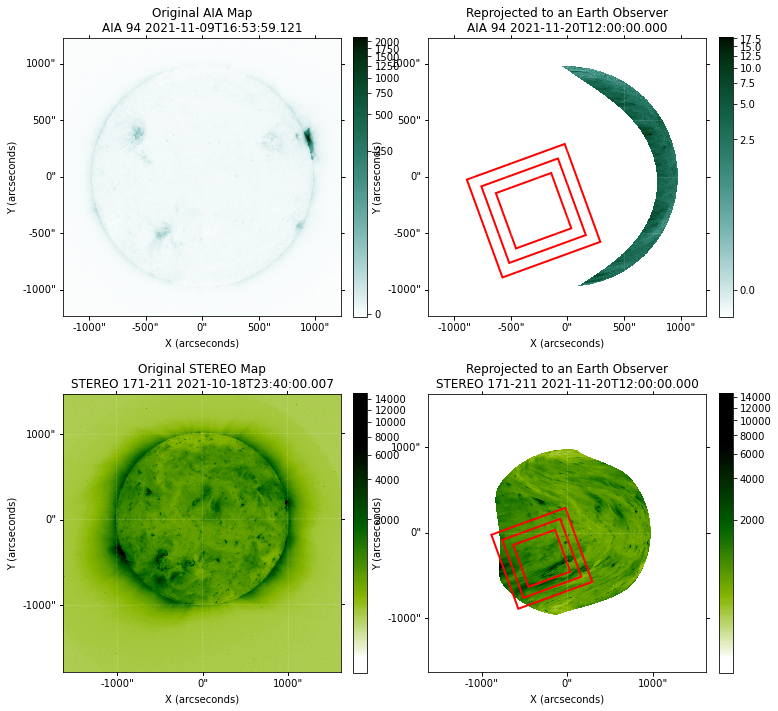

In [3]:
plt.figure(figsize=(12,12))
axes = mp.reprojection(t_obs_start, *nustar_center, [-100, 0, 100], rotate=nu_SNangle)
plt.show()

***

**Brian's example on NuSTAR solar observation planning (https://github.com/NuSTAR/nustar_pysolar/blob/main/notebooks/Planning_Example.ipynb).**

**I did have to go an manually download the planet ephemeris data file de436.bsp from https://ssd.jpl.nasa.gov/ftp/eph/planets/bsp/ since nustar_pysolar kept timing out with the website. This file is also too large to uplaod to Github.**

In [4]:
# Use Brian's planning Notebook: https://github.com/NuSTAR/nustar_pysolar/blob/main/notebooks/Planning_Example.ipynb

# Get occultation period times
fname = io.download_occultation_times(outdir='./data/')

# Define observing window
orbits = planning.sunlight_periods(fname, tstart=t_obs_start, tend=t_obs_end)

# Calculate the PA angle
pa = planning.get_nustar_roll(t_obs_start, nu_SNangle<<u.deg) # angle is anti-clockwise starting with Det0 in top-left
print("For a \"square\" field of view, use angle=0 / 90 / 180 / 270 to have DET0\nat the NE / SE / SW / NW corners of a square field of view.")
print("NuSTAR Roll angle for anti-clockwise rotation of {} deg (with Det0 initially in top left position): {}".format(nu_SNangle, pa))

# Define offset, +West, +North
offset = nustar_center*u.arcsec

# Loop over orbits and find pointing in RA/Dec
for ind, orbit in enumerate(orbits):
    midTime = (0.5*(orbit[1] - orbit[0]) + orbit[0])
    sky_pos = planning.get_skyfield_position(midTime, offset, load_path='./data', parallax_correction=True)
    print("Orbit: {}".format(ind))
    print("Orbit start: {} Orbit end: {}".format(orbit[0], orbit[1]))
    print('Aim time: {} RA (deg): {} Dec (deg): {}'.format(midTime, sky_pos[0], sky_pos[1]))
    print("")

For a "square" field of view, use angle=0 / 90 / 180 / 270 to have DET0
at the NE / SE / SW / NW corners of a square field of view.
NuSTAR Roll angle for anti-clockwise rotation of 20 deg (with Det0 initially in top left position): 39.71937268383016 deg
100% [........................................................] 355040 / 355040Orbit: 0
Orbit start: 2021-11-20T11:29:20.000 Orbit end: 2021-11-20T12:31:30.000
Aim time: 2021-11-20T12:00:25.000 RA (deg): 235.88215878354973 deg Dec (deg): -19.838241416418352 deg



***

***